<a href="https://colab.research.google.com/github/nerumur/Valeria/blob/main/hw_6_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# Задание 1

# Импортируем библиотеки для скрейпинга веб-страниц

import requests                                   # помогает нам отправлять запросы на веб-сайты и получать от них данные

from bs4 import BeautifulSoup                     # помогает нам «разобрать» HTML-код страницы, чтобы мы могли легко находить нужные нам данные

In [46]:
url = 'https://en.wikipedia.org/wiki/Chomsky_hierarchy'           # откуда скрейпим

def scrape_text_from_url(url, tag, class_=None):
# url — адрес веб-страницы, откуда мы хотим получить текст
# tag — HTML-тег, который мы ищем (например, <p> для абзацев)
# class_ — (необязательный) класс, который может быть у тега. Если мы не укажем класс, функция будет искать только по тегу

  response = requests.get(url)    # отправляем запрос на указанный URL и сохраняем ответ в переменной response (как если бы обратились через браузер)

  if response.status_code == 200:                       # если запрос успешный (возвращается значение 200). Код 200 означает, что всё в порядке
    soup = BeautifulSoup(response.text, "html.parser")  # парсим контент или текст с помощью BeautifulSoup html.parser
    paragraphs = soup.find_all(tag, class_)             # ищем теги и классы на основании аргументов функции; по умолчанию ищем только тег
    text = ''                                           # создаем переменную text строкового типа, куда мы запишем все найденные совпадения
    for i in paragraphs:                                # начинаем перебор элементов переменной paragraphs
      text += i.get_text()                              # извлекаем текстовые данные
    return text
  else:
    print('Ошибка: ', response.status_code)             # выводим статус-код и сообщение об ошибке

scrape_text_from_url('https://therian.fandom.com/wiki/Quadrobics', 'p')   #проверка

'"I have four legs, so why do I have to walk on two?"\nBRRNANA\xa0!!, Blog postQuadrobics, also known as quads, is a form of sport whereas oneself will perform tricks such as walking, running, jumping, trotting, etc on all four legs. It is associated with sports and many companies even set up tournaments for quadrobics. You do not need to be a therian to do quadrobics, quadrobics is a choice in of itself.\nFollowing its titular description, quadrobics is based around the exercise of the four primary muscle groups of the human body; the quadriceps, quadratus lumborum, quadriceps surae and the quadriceps femoris.\nQuadrobics is a portmanteau of English "Quadruped(al)" and "Aerobics".\nBelow is a full list of the correct and incorrect terminology and knowledge of quadrobics. View the key to understand the information better.\n\xa0 \xa0\xa0 \xa0Underlined = What is\n\xa0 \xa0\xa0 \xa0Bold = What isn\'t\nDespite quadrobics being a fun and therapeutic sport, there are some benefits & risks t

In [47]:
# Проверяем функцию для скрейпинга: пример 2

scrape_text_from_url('https://www.rottentomatoes.com/m/civil_war_2024/reviews', 'p', 'review-text')

# Class: 'review-text' — это дополнительная информация. Ищем только те теги, которые имеют класс review-text
# Это важно, потому что на странице может быть много тегов, но не все они содержат текст отзывов

"Civil War is not a film about why extreme division happens; it’s about the personal impact of division at its worst.A staggering and frequently brilliant film looking at a hopefully just fictionalized version of America destroying itself from within.Garland seems poised to be make political points, to show how our current political dysfunction could lead to something far worse… but he never follows through.This violent tale of anaesthetised reporters is just a war yarn with a twist.This easy digital fakeness is there to get the audience used to it...Rather than glorifying war, the film is artful and meditative, making us feel the pointlessness of this violence, how unglamorous and exhausting and unheroic it is.It’s not always subtle, and in some cases it’s even frustrating with some of its narrative decisions, but nothing can deny its uncanny ability to leave you horrified by how war, civil or otherwise, can be truly monstrous from any humanist angle.The film isn’t very deep, but it d

In [48]:
# Задание 2. Написать функцию для сентимент-анализа (анализа тональности)

# Загружаем списки слов с положительным и отрицательным значением
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt

with open('neg.txt') as f:        # открываем файлы + заносим в переменные
  neg = f.read()

with open('pos.txt') as f:
  pos = f.read()

--2024-12-17 19:27:13--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44759 (44K) [text/plain]
Saving to: ‘neg.txt.1’

neg.txt.1           100%[===================>]  43.71K  --.-KB/s    in 0.01s   

2024-12-17 19:27:14 (3.77 MB/s) - ‘neg.txt.1’ saved [44759/44759]

--2024-12-17 19:27:14--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19093 (19K) [text/plain]
Savi

In [49]:
# Создайте списки слов, разделив строку по знаку \n

pos_list = pos.split('\n')             # сплит создает список
neg_list = neg.split('\n')

pos_list[:10]

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation']

In [50]:
import spacy
nlp = spacy.load("en_core_web_sm")

'''
Функция принимает на вход 3 аргумента:
  - переменную text с текстов для анализа
  - 2 списка со словами для анализа тональности: positive_words и negative_words
'''

def analyze_sentiment(text, positive_words, negative_words):    # text - любой, который хотим проанализировать; при вызове функции ставим туда текст

# удалить стоп-слова и знаки препинания; использовать NLP-библиотеки для токенизации
  doc = nlp(text.lower())                                    # токенизируем текст + приводим к нижнему регистру
  filtered_tokens = []
  for t in doc:                                              # для каждого tokena в doc
    if not t.is_stop and not t.is_punct:                     # проверяем является ли токен стоп-словом или пунктуацией
        filtered_tokens.append(t.text)                       # добавляем его в список

  words = filtered_tokens                                    # запишите результат в переменную words

# Считаем скор тональности: количество пересечений между списками words и положительными / отрицательными словами
  positive_count = sum(1 for word in words if word in positive_words)
  negative_count = sum(1 for word in words if word in negative_words)
  if positive_count > negative_count:               # если положительный скор больше отрицательного, возвращаем строчку 'positive'
    return 'positive'
  elif negative_count > positive_count:
    return 'negative'                               # если отрицательный скор больше положительного, возвращаем строчку 'negative'
  else:
    return 'neutral'                                # иначе возвращаем строчку 'neutral'

In [51]:
'''
Проверяем функцию для анализа тональности: пример 1
'''

result = analyze_sentiment('This sample text is awesome!', pos_list, neg_list)
print(result)

positive


In [52]:
'''
Проверяем функцию для анализа тональности: пример 2
'''

analyze_sentiment('I hate this sample text.', pos_list, neg_list)

'negative'

In [53]:
'''
Проверяем функцию для анализа тональности: пример 3
'''

analyze_sentiment('We love and hate this sample text at the same time!', pos_list, neg_list)

'neutral'

In [54]:
# Задача 3. Написать функцию для вывода сентимент-скоров.

'''
Допишите функцию для вывода скоров по заданному URL
'''

def analyze(positive_words, negative_words, url, tag, class_=None):
  scraped_text = scrape_text_from_url(url, tag, class_)           # примените функцию scrape_text_from_url
  sentences = scraped_text.split('.')                             # сегментируйте текст по предложениям (через точку)
  sentiments = []                                                 # создаем пустой список, куда запишем скоры
  for s in sentences:                                             # начинаем перебор по предложениям
    score = analyze_sentiment(s, pos_list, neg_list)              # получаем скор для данного предложения с помощью функции analyze_sentiment
    sentiments.append(score)                                      # добавляем скор в созданный список
  return sentiments                                               # возвращаем список скоров

In [55]:
'''
Тест 1
'''

analyze(url='https://en.wikipedia.org/wiki/Chomsky_hierarchy', tag='p', positive_words=pos, negative_words=neg)[:10]

['neutral',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral']

In [56]:
'''
Тест 2
'''

analyze(url='https://www.rottentomatoes.com/m/civil_war_2024/reviews', tag='p', class_='review-text', positive_words=pos, negative_words=neg)[:10]

['negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral']

In [57]:
# Задача 4. Визуализировать результаты анализа.

'''
Создаем частотный словарь с помощью библиотеки Counter.
Можно выбрать другие веб-страницы для анализа!
'''

from collections import Counter

sample1 = Counter(analyze(url='https://en.wikipedia.org/wiki/Baby_boomers', tag='p', positive_words=pos, negative_words=neg))
sample2 = Counter(analyze(url='https://en.wikipedia.org/wiki/Generation_Z', tag='p', positive_words=pos, negative_words=neg))

sample1

Counter({'positive': 208, 'neutral': 392, 'negative': 150})

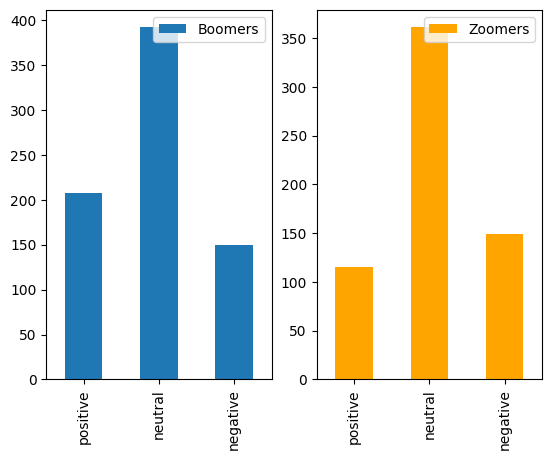

In [58]:
'''
Создаем визуализацию: попробуйте использование новые данные (данные других url)
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.DataFrame.from_dict(sample1, orient='index', columns=['Boomers'])
df2 = pd.DataFrame.from_dict(sample2, orient='index', columns=['Zoomers'])

fig, ax = plt.subplots(ncols=2)

ax[0] = df1.plot.bar(ax=ax[0])
ax[1] = df2.plot.bar(ax=ax[1], color='orange')

In [67]:
# Задача 5

'''
Соберите все 3 функции в одной ячейке ниже. Проанализируйте получшившийся код. Сделайте ревью!

Попробуйте сделать рефакторинг: найти повторы в коде, избыточные конструкции и заменить их на более простые и питоничные решения.
Рефакторинг ускоряет выполнение кода и упрощает его чтение.

Улучшите код, добавьте строчки для вывода промежуточных и итоговых результатов; запустите ячейку.

Это творческое задание, правильных решений нет - главное, чтобы код работал! :)

Не забудьте закомментировать свои изменения.
'''

def scrape_text_from_url(url, tag, class_=None):
  response = requests.get(url)
  if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    paragraphs = soup.find_all(tag, class_)
    text = ''.join([i.get_text() for i in paragraphs])                   # поменяли цикл на list comprehension
    print('Text from the URL: ')
    print()
    print(text)
    print()
    return text
  else:
    print('Ошибка: ', response.status_code)

def analyze_sentiment(text, positive_words, negative_words):
  doc = nlp(text.lower())
  filtered_tokens = [t.text for t in doc if not t.is_stop and not t.is_punct]     # поменяли цикл на list comprehension
  words = filtered_tokens
  positive_count = sum(1 for word in words if word in positive_words)
  negative_count = sum(1 for word in words if word in negative_words)
  if positive_count > negative_count:
    return 'positive'
  elif negative_count > positive_count:
    return 'negative'
  else:
    return 'neutral'

def analyze(positive_words, negative_words, url, tag, class_=None):
  scraped_text = scrape_text_from_url(url, tag, class_)
  sentences = scraped_text.split('.')
  sentiments = [analyze_sentiment(s, pos_list, neg_list) for s in sentences]      # поменяли цикл на list comprehension
  print('Sentiment score: ')
  print()
  print(sentiments)
  return sentiments